In [751]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency


In [752]:
athlete_df= pd.read_csv("step 3-Cleaning Data records.csv")
athlete_df=athlete_df.drop(columns=["Unnamed: 0"])


In [753]:
athlete_df

,Rank,Mark,Wind,Competitor,Gender,Age,Country,Position,Venue,Date,Result Score,Age of competition,Speed meter per second=m/s
0,1,9.58,0.9,Usain BOLT,Male,35.0,JAM,1.0,"Olympiastadion, Berlin (GER)",16-08-2009,1356,23.0,10.438413
1,1,10.49,0.0,Florence GRIFFITH-JOYNER,Female,62.0,USA,1.0,"Indianapolis, IN (USA)",16-07-1988,1314,29.0,9.532888
2,3,9.68,4.1,Tyson GAY,Male,39.0,USA,1.0,"Eugene, OR (USA)",29-06-2008,1295,26.0,10.330579
3,4,9.69,5.0,Obadele THOMPSON,Male,45.0,BAR,1.0,"El Paso, TX (USA)",13-04-1996,1286,20.0,10.319917
4,4,9.69,4.8,André DE GRASSE,Male,27.0,CAN,1.0,"Olympiastadion, Stockholm (SWE)",18-06-2017,1288,23.0,10.319917
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5300,28461,11.50,NaN,Magnolia LAFLEUR,Female,38.0,TTO,3.0,"Los Angeles, CA (USA)",07-04-2012,1093,29.0,8.695652
5301,28461,11.50,0.7,Sherine WELLS,Female,33.0,CAN,1.0,"Waco, TX (USA)",23-04-2011,1093,23.0,8.695652
5302,28461,11.50,0.5,Melissa SWANEPOEL,Female,30.0,RSA,1.0,Pretoria (RSA),25-04-2014,1093,23.0,8.695652
5303,28461,11.50,1.3,Yolanda DÍAZ,Female,53.0,ESP,1.0,Barcelona (ESP),15-08-1987,1093,19.0,8.695652


Text(0.5, 0.98, 'Gender pie charts')

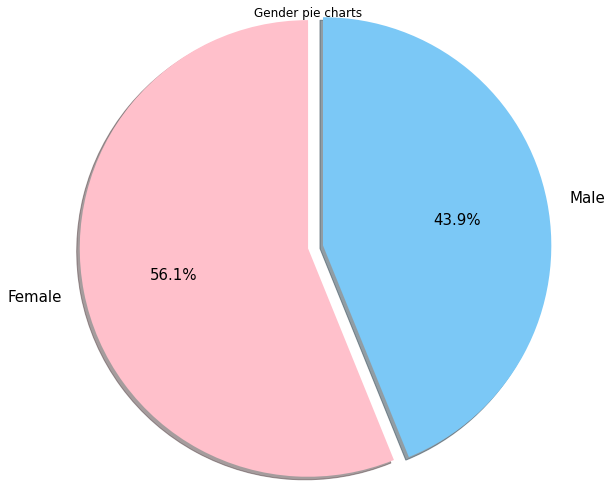

In [754]:
result = athlete_df['Gender'].value_counts()
value = result.values.tolist()
trend_index = ['Female', 'Male']
trend_colors =['#FFC0CB', '#7BC8F6']
fig, axs = plt.subplots(figsize=(8,7))

axs.pie(value, labels=trend_index, autopct='%1.1f%%', shadow=True, startangle=90,
           explode=(0.05, 0.05), radius=1.5, colors=trend_colors, textprops={'fontsize':15})

fig.suptitle('Gender pie charts')

30-45    1985
46+      1657
18-29    1369
Name: range age, dtype: int64


<AxesSubplot:ylabel='range age'>

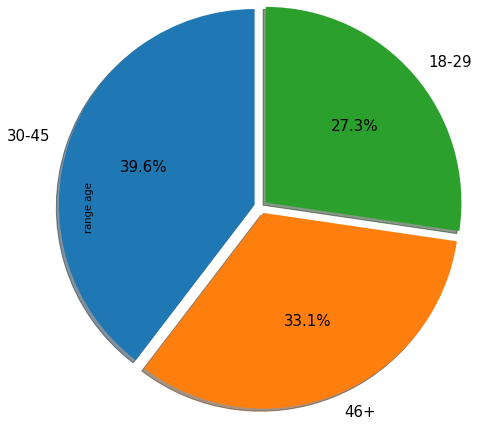

In [755]:
athlete_df['range age'] = pd.cut(athlete_df['Age'],bins=[17,29,45,120], labels=["18-29","30-45","46+"])
a = athlete_df.groupby('range age').size()
a = athlete_df['range age'].value_counts()
print (a)
a.plot.pie(autopct='%1.1f%%',shadow=True,startangle=90,explode=(0.05, 0.05,0.05),radius=1.5,figsize=(7,6),textprops={'fontsize':15})


In [756]:
#athlete_df.drop('range age',axis='columns', inplace=True)

In [757]:
athlete_df

,Rank,Mark,Wind,Competitor,Gender,Age,Country,Position,Venue,Date,Result Score,Age of competition,Speed meter per second=m/s,range age
0,1,9.58,0.9,Usain BOLT,Male,35.0,JAM,1.0,"Olympiastadion, Berlin (GER)",16-08-2009,1356,23.0,10.438413,30-45
1,1,10.49,0.0,Florence GRIFFITH-JOYNER,Female,62.0,USA,1.0,"Indianapolis, IN (USA)",16-07-1988,1314,29.0,9.532888,46+
2,3,9.68,4.1,Tyson GAY,Male,39.0,USA,1.0,"Eugene, OR (USA)",29-06-2008,1295,26.0,10.330579,30-45
3,4,9.69,5.0,Obadele THOMPSON,Male,45.0,BAR,1.0,"El Paso, TX (USA)",13-04-1996,1286,20.0,10.319917,30-45
4,4,9.69,4.8,André DE GRASSE,Male,27.0,CAN,1.0,"Olympiastadion, Stockholm (SWE)",18-06-2017,1288,23.0,10.319917,18-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5300,28461,11.50,NaN,Magnolia LAFLEUR,Female,38.0,TTO,3.0,"Los Angeles, CA (USA)",07-04-2012,1093,29.0,8.695652,30-45
5301,28461,11.50,0.7,Sherine WELLS,Female,33.0,CAN,1.0,"Waco, TX (USA)",23-04-2011,1093,23.0,8.695652,30-45
5302,28461,11.50,0.5,Melissa SWANEPOEL,Female,30.0,RSA,1.0,Pretoria (RSA),25-04-2014,1093,23.0,8.695652,30-45
5303,28461,11.50,1.3,Yolanda DÍAZ,Female,53.0,ESP,1.0,Barcelona (ESP),15-08-1987,1093,19.0,8.695652,46+


1-3    4518
4-5     458
6-9     148
Name: pos, dtype: int64


<AxesSubplot:ylabel='pos'>

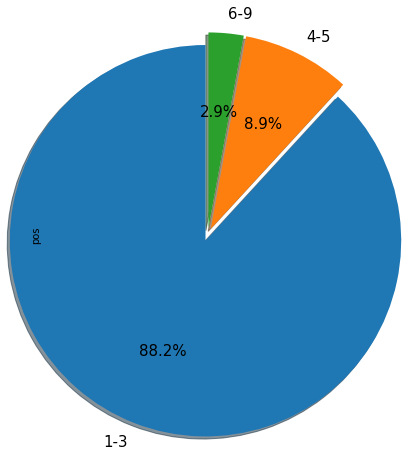

In [758]:
athlete_df['pos'] = pd.cut(athlete_df['Position'],bins=[0,3,5,9] ,labels=["1-3","4-5","6-9"])
a = athlete_df.groupby('pos').size()
a = athlete_df['pos'].value_counts()
print (a)
a.plot.pie(autopct='%1.1f%%',shadow=True,startangle=90,explode=(0.05,0.05,0.05),radius=1.5,figsize=(7,6),textprops={'fontsize':15})

In [759]:
#athlete_df.drop('pos',axis='columns', inplace=True)

9.5-10     2670
8.5-9      1919
9-9.5       406
10-10.5     310
Name: m/s, dtype: int64


<AxesSubplot:ylabel='m/s'>

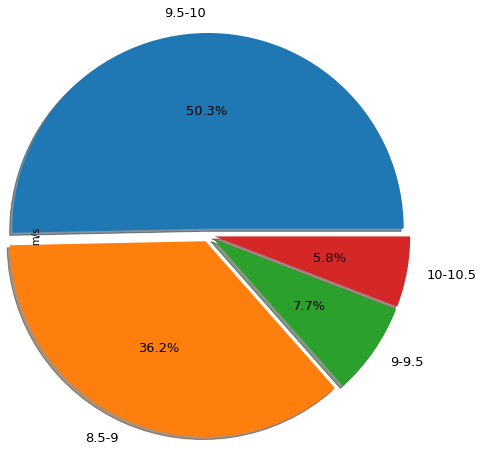

In [760]:
athlete_df['m/s'] = pd.cut(athlete_df['Speed meter per second=m/s'],bins=[8.5,9,9.5,10,10.5], labels=["8.5-9","9-9.5","9.5-10","10-10.5"])
a = athlete_df.groupby('m/s').size()
a = athlete_df['m/s'].value_counts()
print (a)
a.plot.pie(autopct='%1.1f%%',shadow=True,startangle=0,explode=(0.05,0.05,0.05,0.05),radius=1.5,figsize=(7,6),textprops={'fontsize':13})


In [761]:
#athlete_df.drop('m/s',axis='columns', inplace=True)

In [762]:
athlete_df['America']=0

In [763]:
athlete_df["Europe"]=0

In [764]:
athlete_df["Asia"]=0

In [765]:
athlete_df["Africa"]=0

In [766]:
athlete_df=athlete_df.sort_values(by='Result Score', ascending=False)
athlete_df

,Rank,Mark,Wind,Competitor,Gender,Age,Country,Position,Venue,Date,Result Score,Age of competition,Speed meter per second=m/s,range age,pos,m/s,America,Europe,Asia,Africa
0,1,9.58,0.9,Usain BOLT,Male,35.0,JAM,1.0,"Olympiastadion, Berlin (GER)",16-08-2009,1356,23.0,10.438413,30-45,1-3,10-10.5,0,0,0,0
5,4,9.69,-0.1,Yohan BLAKE,Male,32.0,JAM,1.0,"Stade Olympique de la Pontaise, Lausanne (SUI)",23-08-2012,1316,23.0,10.319917,30-45,1-3,10-10.5,0,0,0,0
1,1,10.49,0.0,Florence GRIFFITH-JOYNER,Female,62.0,USA,1.0,"Indianapolis, IN (USA)",16-07-1988,1314,29.0,9.532888,46+,1-3,9.5-10,0,0,0,0
9,10,9.72,0.2,Asafa POWELL,Male,39.0,JAM,1.0,"Stade Olympique de la Pontaise, Lausanne (SUI)",02-09-2008,1305,26.0,10.288066,30-45,1-3,10-10.5,0,0,0,0
11,13,9.74,0.9,Justin GATLIN,Male,39.0,USA,1.0,"Suhaim bin Hamad Stadium, Doha (QAT)",15-05-2015,1298,33.0,10.266940,30-45,1-3,10-10.5,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5129,27527,10.30,8.5,Tim MASON,Male,NaN,USA,1.0,"Romeoville, IL (USA)",21-04-2001,1054,NaN,9.708738,NaN,1-3,9.5-10,0,0,0,0
5296,28461,11.50,6.6,Kandice BELL,Female,38.0,USA,5.0,"Fort Worth, TX (USA)",21-04-2007,1054,24.0,8.695652,30-45,4-5,8.5-9,0,0,0,0
4981,27356,11.49,7.1,Jeanette PETTIGREW,Female,32.0,USA,1.0,"Dekalb, IL (USA)",14-05-2011,1053,22.0,8.703220,30-45,1-3,8.5-9,0,0,0,0
4976,27356,11.49,7.3,Kareen Alecia CLARKE,Female,40.0,JAM,2.0,"Flagstaff, AZ (USA)",03-07-2000,1052,19.0,8.703220,30-45,1-3,8.5-9,0,0,0,0


In [767]:
a = athlete_df['Country'].value_counts()
a

USA    2001
JAM     308
GBR     194
JPN     162
NGR     138
       ... 
HON       1
GUA       1
GBS       1
STP       1
PRK       1
Name: Country, Length: 143, dtype: int64

In [768]:
athlete_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5305 entries, 0 to 4645
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Rank                        5305 non-null   int64   
 1   Mark                        5305 non-null   float64 
 2   Wind                        4879 non-null   float64 
 3   Competitor                  5305 non-null   object  
 4   Gender                      5305 non-null   object  
 5   Age                         5020 non-null   float64 
 6   Country                     5305 non-null   object  
 7   Position                    5124 non-null   float64 
 8   Venue                       5305 non-null   object  
 9   Date                        5305 non-null   object  
 10  Result Score                5305 non-null   int64   
 11  Age of competition          5020 non-null   float64 
 12  Speed meter per second=m/s  5305 non-null   float64 
 13  range age         

In [769]:
athlete_df.describe()

,Rank,Mark,Wind,Age,Position,Result Score,Age of competition,Speed meter per second=m/s,America,Europe,Asia,Africa
count,5305.000000,5305.000000,4879.000000,5020.000000,5124.000000,5305.000000,5020.000000,5305.000000,5305.0,5305.0,5305.0,5305.0
mean,13675.677663,10.652411,2.436708,40.170120,1.903201,1130.324976,23.225299,9.414881,0.0,0.0,0.0,0.0
std,8498.772962,0.578081,1.700089,13.710762,1.334243,38.492991,3.374251,0.503990,0.0,0.0,0.0,0.0
min,1.000000,9.580000,-3.000000,16.000000,1.000000,1047.000000,15.000000,8.695652,0.0,0.0,0.0,0.0
25%,6145.000000,10.180000,1.300000,29.000000,1.000000,1104.000000,21.000000,8.849558,0.0,0.0,0.0,0.0
50%,13729.000000,10.290000,2.300000,38.000000,1.000000,1123.000000,23.000000,9.718173,0.0,0.0,0.0,0.0
75%,20876.000000,11.300000,3.500000,49.000000,2.000000,1150.000000,25.000000,9.823183,0.0,0.0,0.0,0.0
max,28461.000000,11.500000,11.200000,86.000000,9.000000,1356.000000,48.000000,10.438413,0.0,0.0,0.0,0.0


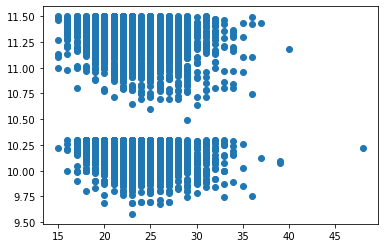

In [770]:
x =athlete_df["Age of competition"]
y= athlete_df["Mark"]


plt.scatter(x, y)
plt.show()

In [772]:
sum(athlete_df["Age of competition"]>45)


1

In [773]:
athlete_df = athlete_df.loc[athlete_df["Age of competition"]<45]
sum(athlete_df["Age of competition"]>45)


0

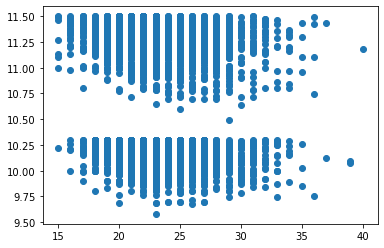

In [774]:
x =athlete_df["Age of competition"]
y= athlete_df["Mark"]


plt.scatter(x, y)
plt.show()

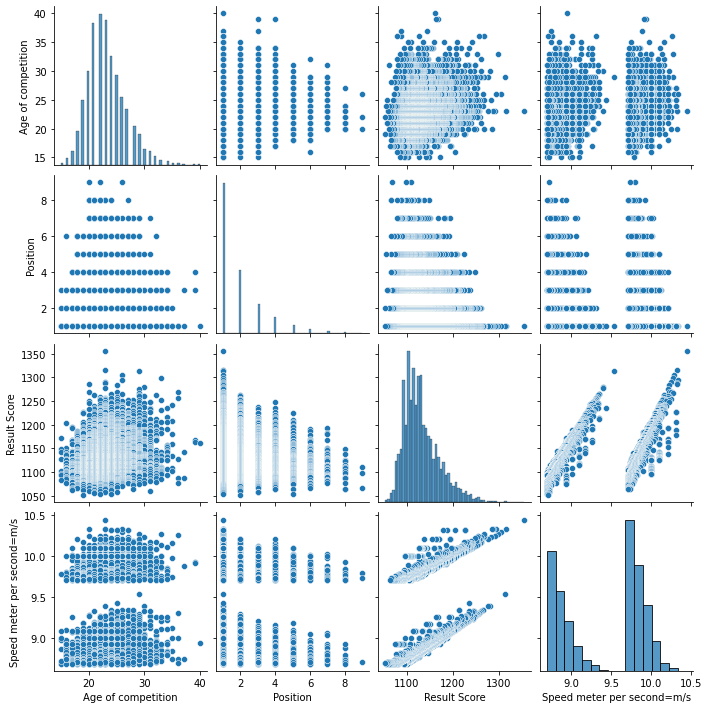

In [777]:
sns.pairplot(athlete_df[['Age of competition', 'Position', 'Gender', 'Result Score',"Speed meter per second=m/s"]])


C:\Users\Eden\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


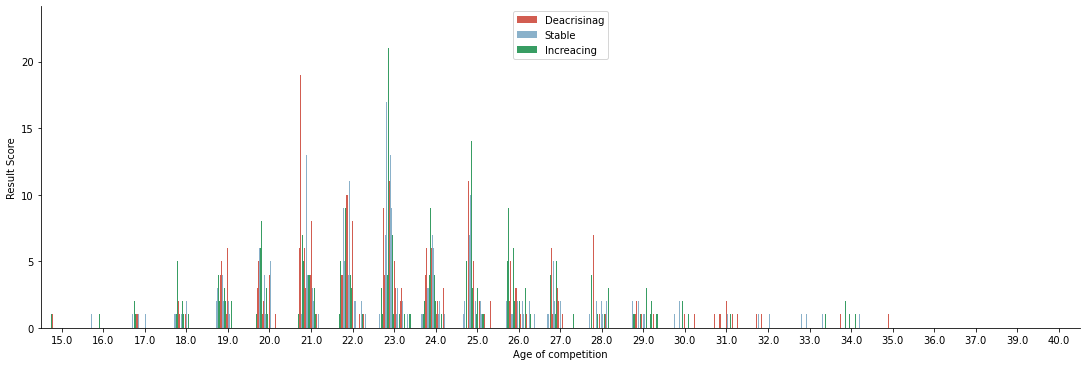

In [780]:
g = sns.catplot(
    x='Age of competition', 
    data = athlete_df,
    kind='count', 
    hue='Result Score',
    palette=['#E74C3C', '#7FB3D5', '#27AE60'],
    height=5, 
    aspect=3,
    legend=False,
    ).set_axis_labels('Age of competition', 'Result Score')
g.ax.legend(labels=['Deacrisinag','Stable', 'Increacing'])

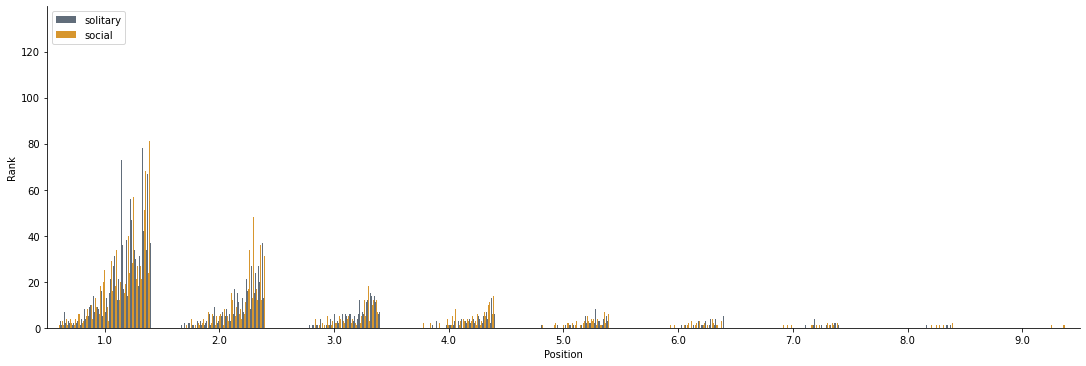

In [786]:
d = sns.catplot(
    x='Position', 
    data = athlete_df,
    kind='count', 
    hue='Rank',
    palette=['#5D6D7E', '#F39C12'],
    height=5, 
    aspect=3,
    legend=False,
    ).set_axis_labels('Position', 'Rank')
d.ax.legend(labels=['solitary','social'])

<AxesSubplot:xlabel='Mark'>

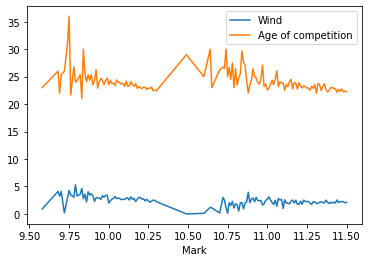

In [792]:
animals_lineplot1 = athlete_df.groupby(['Mark']).mean()[['Wind', 'Age of competition']]
animals_lineplot1.plot()

In [ ]:
= sns.catplot(
    x='Order', 
    data = Specific_Oreders_df,
    kind='count', 
    hue='Mating Behavior',
    palette=['#99A3A4', '#9B59B6'],
    height=5, 
    aspect=3,
    legend=False,
    ).set_axis_labels('Order', 'No of animals')
g.ax.legend(labels=['monogamy','polygamy'])

Text(0, 0.5, 'Gender')

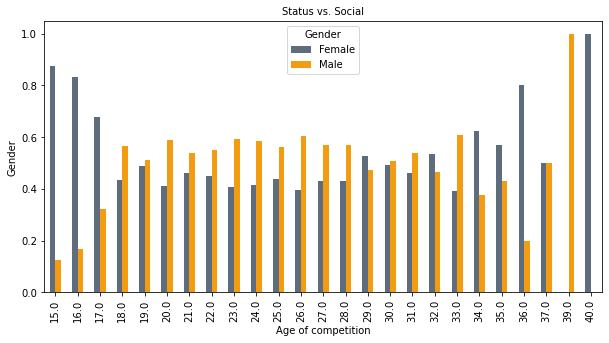

In [794]:
ct_status_social = pd.crosstab(athlete_df['Age of competition'],athlete_df['Gender'], normalize='index')

ct_status_social.plot(kind ='bar', figsize=(10,5), color=['#5D6D7E', '#F39C12'])
plt.title('Status vs. Social', fontsize=10)
plt.xlabel('Age of competition')
plt.ylabel('Gender')

In [ ]:
ct_status_social

In [ ]:
athlete_df['Age of competition'].value_counts()
